Daten erfolgreich geladen.


/tmp/ipykernel_69196/2103862061.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


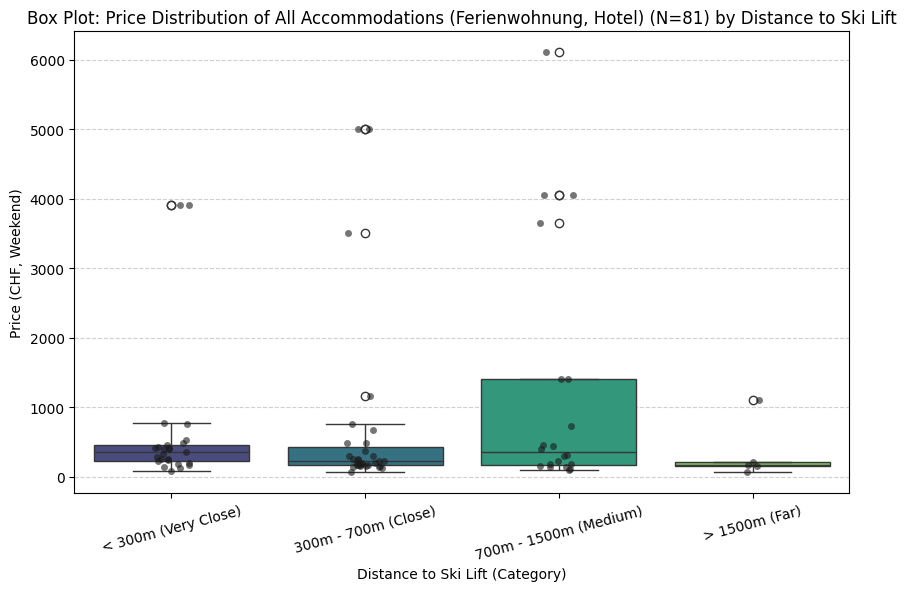

<Figure size 4200x2400 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA
df = pd.read_csv("Davos_combined_cleaned.csv")
print("Daten erfolgreich geladen.")

# 2. CATEGORIZE DISTANCE
# Define bins and labels for distance categorization (in meters)
bins = [0, 300, 700, 1500, df['distance_skilift_meters'].max() + 1]
labels = ['< 300m (Very Close)', '300m - 700m (Close)', '700m - 1500m (Medium)', '> 1500m (Far)']

# Create the new categorical column
df['distance_category'] = pd.cut(
    df['distance_skilift_meters'],
    bins=bins,
    labels=labels,
    right=False,  # Intervals are [lower, upper)
    include_lowest=True
)

# Define the order for the categories
category_order = labels

# 3. CREATE BOX PLOT (ALL TYPES COMBINED)

plt.figure(figsize=(10, 6))

# Box Plot (no 'hue' is used here as all types are combined)
sns.boxplot(
    data=df,
    x='distance_category',
    y='price',
    order=category_order,
    palette="viridis"
)

# Add data points (Stripplot) to show actual density
sns.stripplot(
    data=df,
    x='distance_category',
    y='price',
    order=category_order,
    color=".1", # Dark color
    jitter=0.1, # Scatter points
    size=5,
    alpha=0.6
)

# 4. FORMAT AND DISPLAY GRAPHIC

plt.title(f"Box Plot: Price Distribution of All Accommodations (Ferienwohnung, Hotel) (N={len(df)}) by Distance to Ski Lift")
plt.xlabel("Distance to Ski Lift (Category)")
plt.ylabel("Price (CHF, Weekend)")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Increase plot size and set DPI for better quality
plt.figure(figsize=(14, 8), dpi=300)

plt.show()